## ICE-12. Audio Features - 2
Please download the input dataset zip from the following link:<br>
https://drive.google.com/file/d/1O7paHG4kRekcUlCya4G5tfBZEjQRAkKm/view?usp=share_link <br><br>

# Question 1 

### Whats is Cepstrum ?

## Answer Here 
Cepstrum is formed when inverse fourier transforms are applied to a signal's spectrum. It is used to define and locate the frequency spectrum. Combining these signals yields the Ceptra sum. The power spectrum function is used to locate music and speech signals. It is a popular audio processing method for low-frequency audio applications.

###**Tutorial**

- Download sample audio file
- Verify if its present
- import required libraries

In [2]:
!pip install torchaudio==0.12.1
!curl -O https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav
!ls CantinaBand3.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  129k  100  129k    0     0   714k      0 --:--:-- --:--:-- --:--:--  710k
CantinaBand3.wav


In [3]:
from matplotlib import pyplot as plt
from IPython import display

import torch
import torchaudio
from scipy.io import wavfile

import numpy as np
assert torch.__version__.startswith('1.12'), 'Please, install torch>=1.12'
assert torchaudio.__version__.startswith('0.12'), 'Please, install torchaudio>=0.12'

## Task 1

- Visualize above audio file  (x axis : time, y axis : amplitude)
- Apply  pitch shifting and visualize again


Text(0.5, 1.0, 'Audio signal')

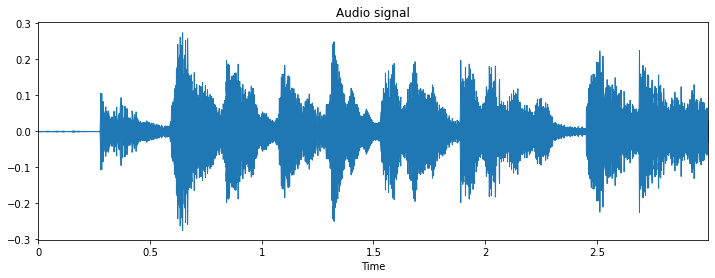

In [4]:
#code here 
import librosa
import librosa.display
data, sample_rate = librosa.load('CantinaBand3.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sample_rate)
plt.title('Audio signal')

Text(0.5, 1.0, 'Pitch shifted signal')

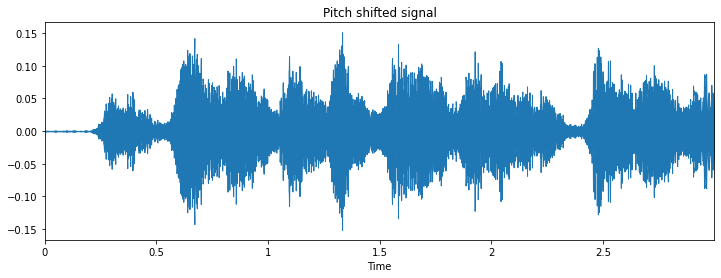

In [5]:
# Applying pitch shift
shifted = librosa.effects.pitch_shift(data , sr=1440, n_steps=-6, bins_per_octave=24)
plt.figure(figsize=(12,4))
librosa.display.waveplot(shifted, sample_rate)
plt.title('Pitch shifted signal')

## Task 2

### Use Hann window and plot the following
- Raw Audio  (x axis - Time , Y axis - amplitude )
- Windowed Audio (x axis - Time , Y axis - amplitude )
- Spectrogram of Raw Audio (Frequency plot)
- Spectrogram of Windowed Audio (Frequency plot)


Text(0.5, 1.0, 'Raw Audio')

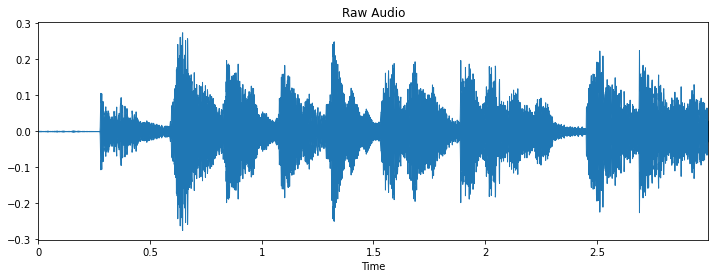

In [6]:
#code here 
import librosa
import librosa.display
data, sample_rate = librosa.load('CantinaBand3.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sample_rate)
plt.title('Raw Audio')

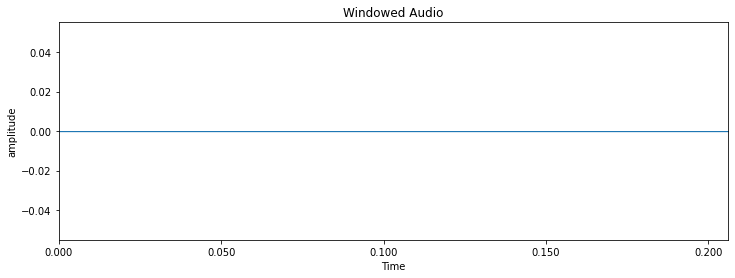

In [7]:
# Windowed Audio
from numba import none
x = np.array(data)
sr = 40100
frame_len, hop_len = 16, 8
frames = librosa.util.frame(x, frame_length=frame_len, hop_length=hop_len)
windowed_frames = np.hanning(frame_len).reshape(-1, 1)*frames
plt.figure(figsize=(12, 4))
plt.ylabel('amplitude')
plt.title('Windowed Audio')
librosa.display.waveplot(windowed_frames, sr, x_axis= 'time')

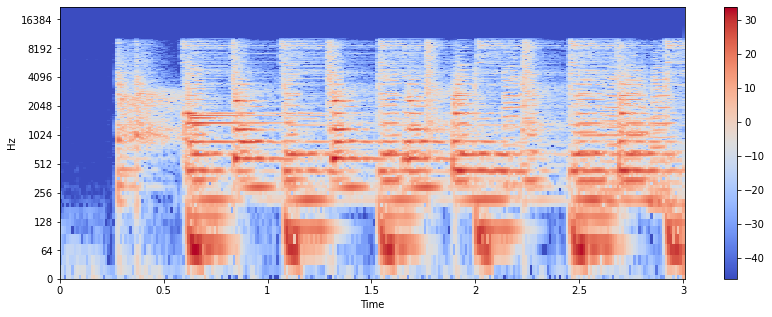

In [8]:
#Spectrogram of raw audio signal
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
filename = 'CantinaBand3.wav'
data1, sr = librosa.load(filename, sr=44100)
X = librosa.stft(data1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'log')
plt.colorbar() 

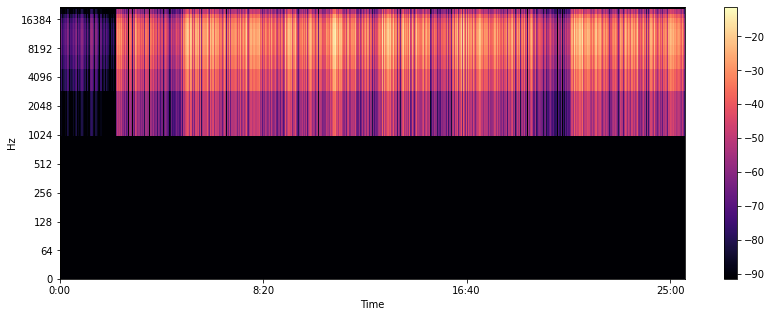

In [12]:
data_array= np.array(data1)
x = 12
z = np.hanning(x).reshape(-1, 1)*data_array 
Xdb = librosa.amplitude_to_db(abs(z))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'log') 
plt.colorbar()

## Task 3

Use STFT and display spectogram for the above audio

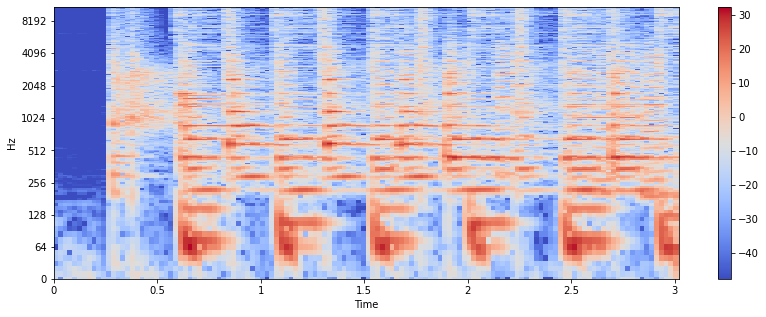

In [9]:
# Code
#Spectrogram of raw audio signal
from scipy import signal
from scipy.io import wavfile
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr = sample_rate, x_axis = 'time', y_axis = 'log')
plt.colorbar() 

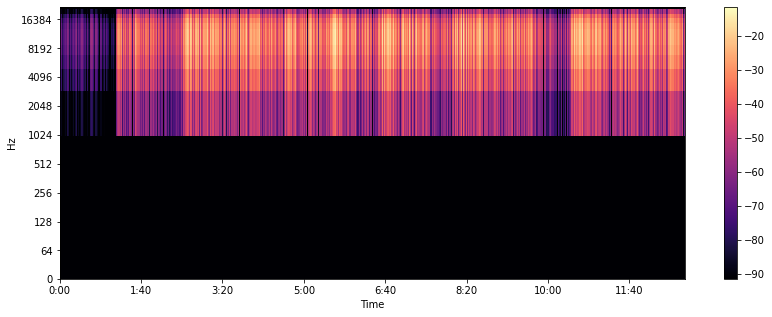

In [10]:
#spectrogram after using hann window
data_array= np.array(data)
x = 12
z = np.hanning(x).reshape(-1, 1)*data_array
Xdb1 = librosa.amplitude_to_db(abs(z))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb1, sr = sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()

## Task 4

- Use Mel scale and apply it to above spectogram of Task 3 and plot it (x axis - Hertz scale  , y-axis - Mels scale )

- Display Mels spectrogram (x - time , y - Mels)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


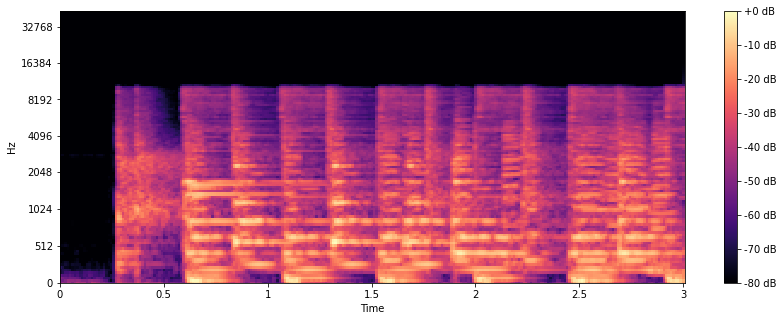

In [13]:
#code here
filename = 'CantinaBand3.wav'
data, sr = librosa.load(filename, sr=sr)
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
mel_scale = librosa.feature.melspectrogram(data, sr=sr)
plt.figure(figsize=(14, 5))
S = librosa.feature.melspectrogram(y= data, sr=sr, n_mels=128,fmax=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, sr = sr, x_axis = 'time', y_axis = 'mel', fmax=sr)
plt.colorbar(img, format='%+2.0f dB')